# PROJETO PARCERIA EBAC - PREVISÃO DE ATRASO EM ENTREGAS LOGÍSTICAS :

PROBLEMÁTICA : É possível prever se uma entrega irá atrasar com base em dados históricos?

Empresas de logística e e-commerce sofrem com atrasos nas entregas, o que gera:

- Insatisfação dos clientes

- Aumento de reclamações

- Perda de credibilidade

- Custos operacionais extras


Porém, muitas empresas não utilizam dados históricos para prever quais entregas têm maior chance de atraso. Com isso nesse projeto vamos criar um codigo onde obtemos a resposta da nossa problemática

In [2]:
# 1 - IMPORTANDO BIBLIOTECAS :

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [5]:
# 2 - CARREGANDO DADOS (FICTÍCIOS) :

data = {
    'distancia_km': [10, 50, 30, 80, 25, 60, 90, 15, 45, 70],
    'tempo_estimado': [30, 90, 60, 120, 50, 100, 150, 40, 80, 110],
    'tempo_real': [35, 110, 55, 140, 60, 130, 180, 38, 85, 150],
    'clima': ['Bom', 'Chuva', 'Bom', 'Chuva', 'Bom', 'Chuva', 'Chuva', 'Bom', 'Bom', 'Chuva'],
    'dia_semana': ['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Seg', 'Ter', 'Qua', 'Qui', 'Sex']
}

df = pd.DataFrame(data)

#DEFININDO O DF :

df['atraso'] = (df['tempo_real'] > df['tempo_estimado']).astype(int)

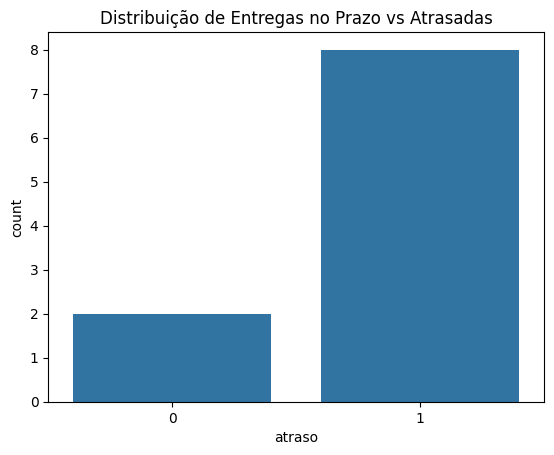

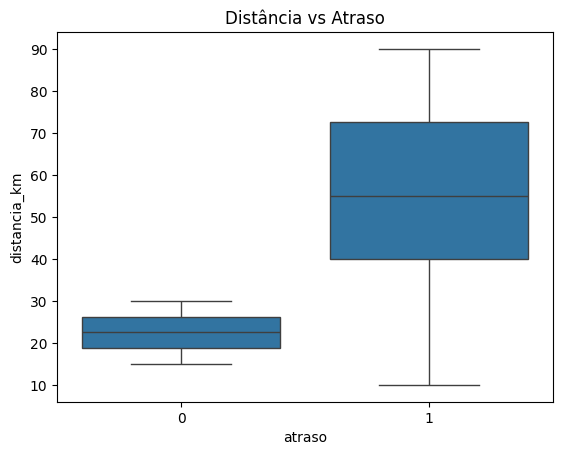

In [6]:
# 3 - EXPLORATORIA DE DADOS :

plt.figure()
sns.countplot(x='atraso', data=df)
plt.title('Distribuição de Entregas no Prazo vs Atrasadas')
plt.show()

plt.figure()
sns.boxplot(x='atraso', y='distancia_km', data=df)
plt.title('Distância vs Atraso')
plt.show()

In [10]:
# 4 - PRÉ PROCESSO :

le = LabelEncoder()
df['clima'] = le.fit_transform(df['clima'])
df['dia_semana'] = le.fit_transform(df['dia_semana'])

X = df.drop(['tempo_real', 'atraso'], axis=1)
y = df['atraso']

# TREINO/TESTE :

X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.2, random_state=42
)

In [13]:
# 5 - MODELO DE TREINO :

modelo = DecisionTreeClassifier(random_state=42)
modelo.fit(X_train, y_train)

#PREVISÃO :

y_pred = modelo.predict(X_test)

In [14]:
# 6 - AVALIAÇÃO DO MODELO :

acuracia = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {acuracia:.2f}")

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

Acurácia do modelo: 1.00

Relatório de Classificação:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


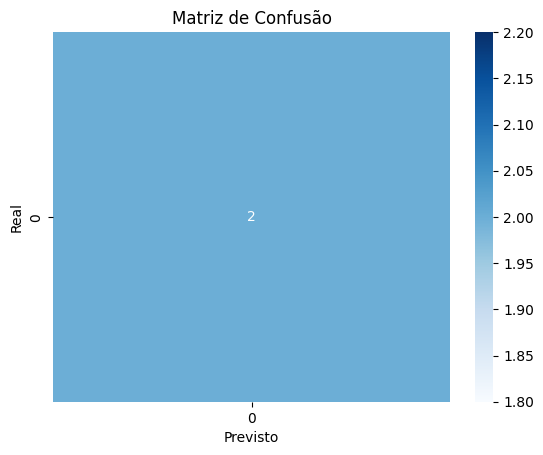

In [15]:
# 7 - MATRIZ CONFUSÃO :

cm = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()